/var/folders/l9/krnz8s9d3f94d8xt3bv8m5680000gn/T/ipykernel_12656/2601800171.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = pd.to_numeric(df_filtered[col], errors="coerce")


0
0
85
15
85
       not_crowded_pct  somewhat_crowded_pct  very_crowded_pct  no_answer_pct  \
count        85.000000             85.000000         85.000000      85.000000   
mean         80.958824             15.075294          3.909412       0.056471   
std           5.049995              3.962560          2.034735       0.194231   
min          67.200000              4.600000          0.000000       0.000000   
25%          78.600000             12.800000          3.000000       0.000000   
50%          81.000000             15.000000          3.700000       0.000000   
75%          84.000000             17.400000          4.600000       0.000000   
max          94.700000             27.400000         12.700000       1.500000   

       total_area_per_person  living_area_per_person  rooms_per_household  \
count              85.000000               85.000000            85.000000   
mean               24.416471               17.154118             2.474118   
std                 2.8397

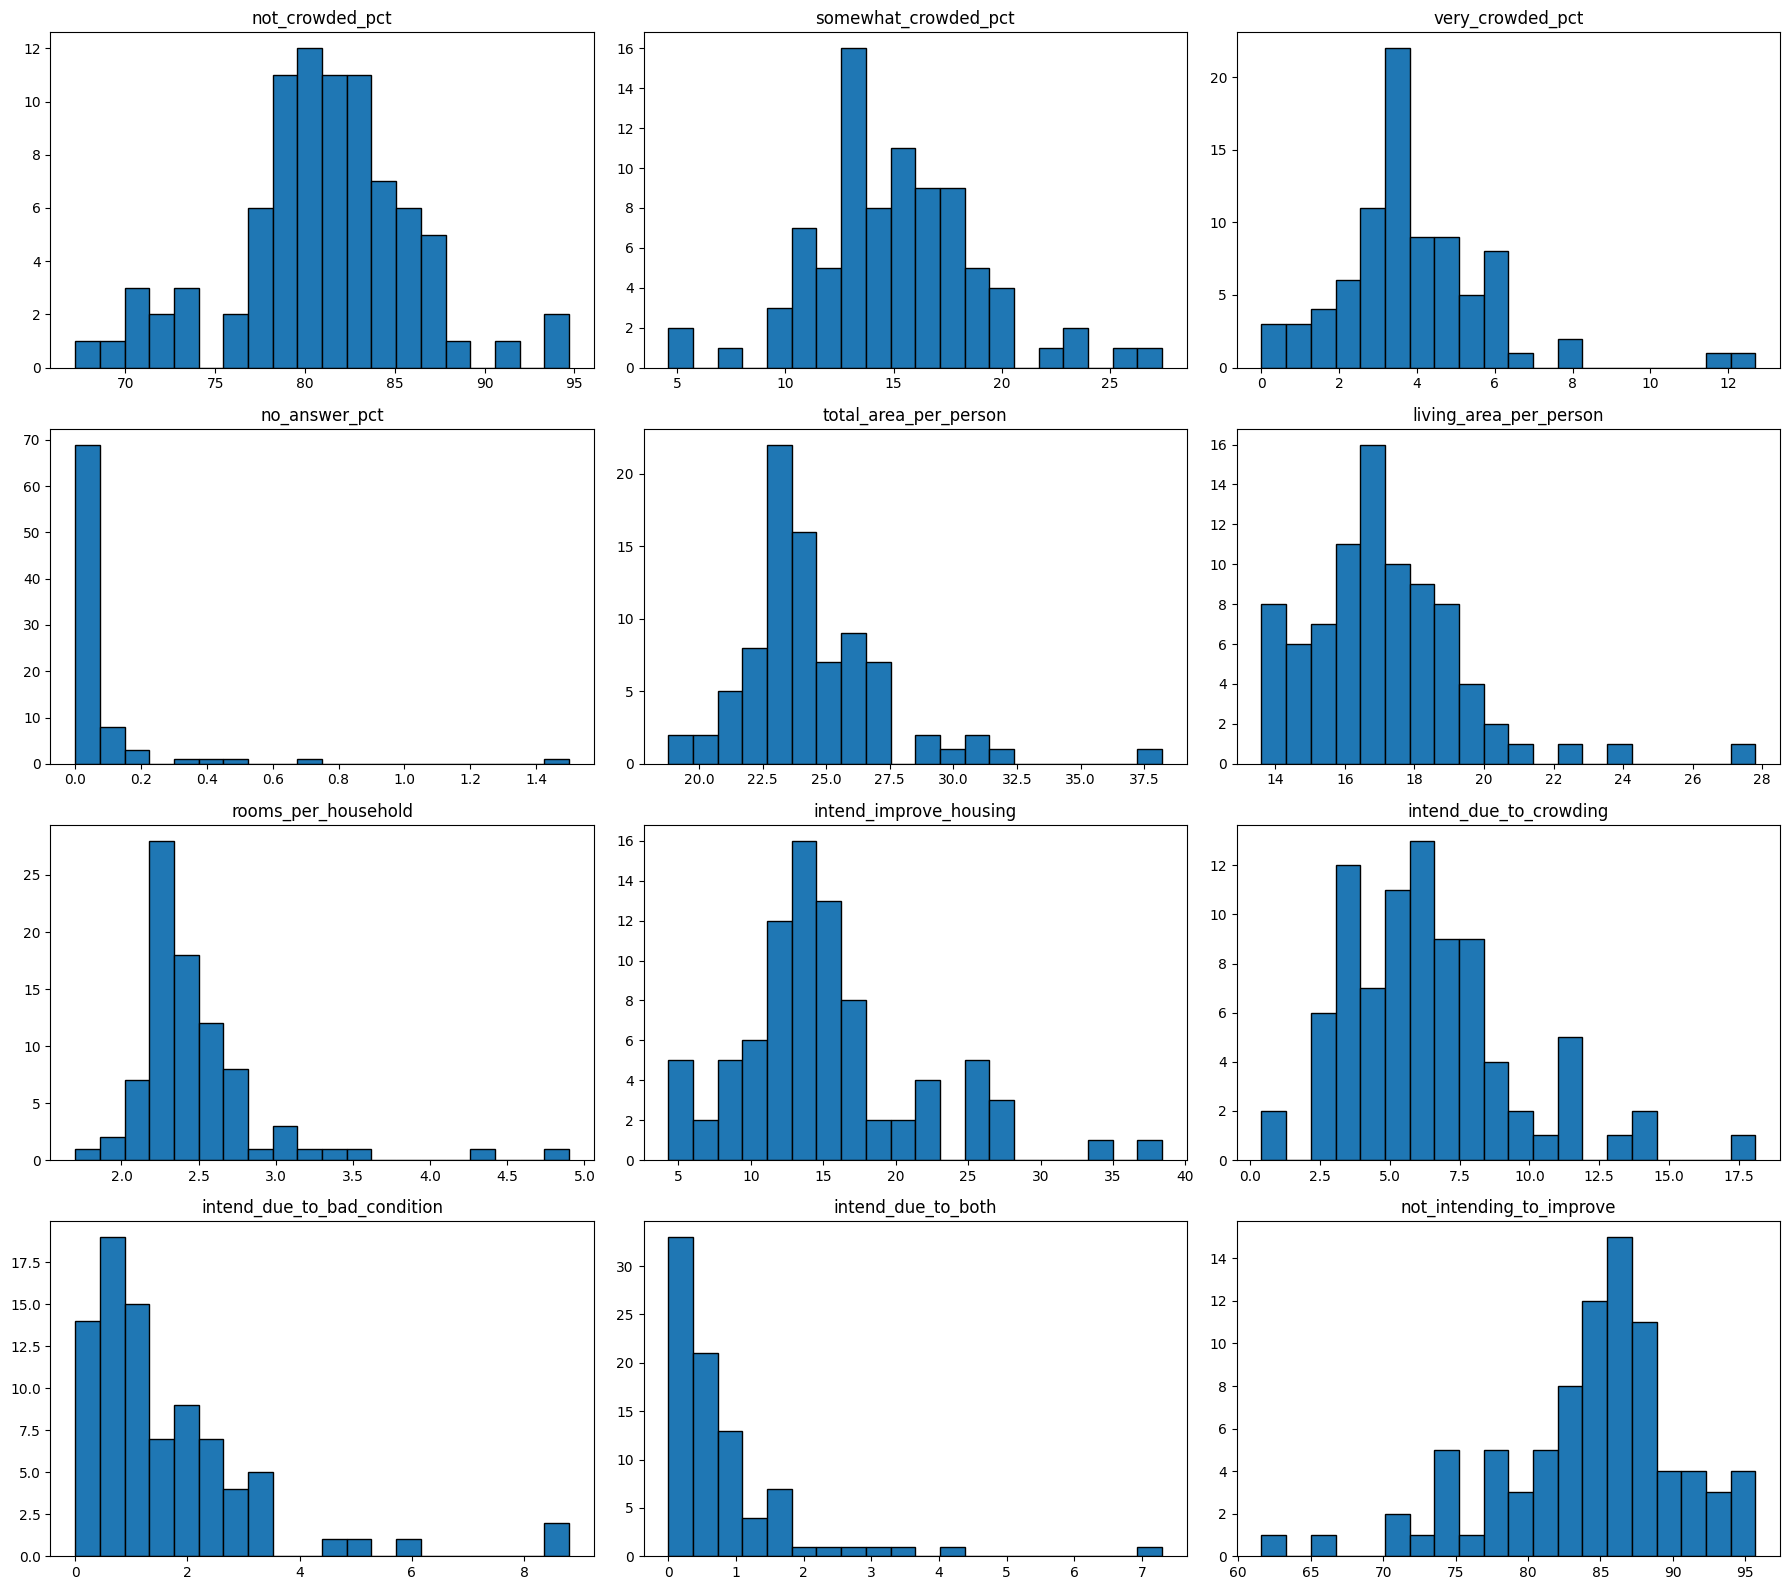

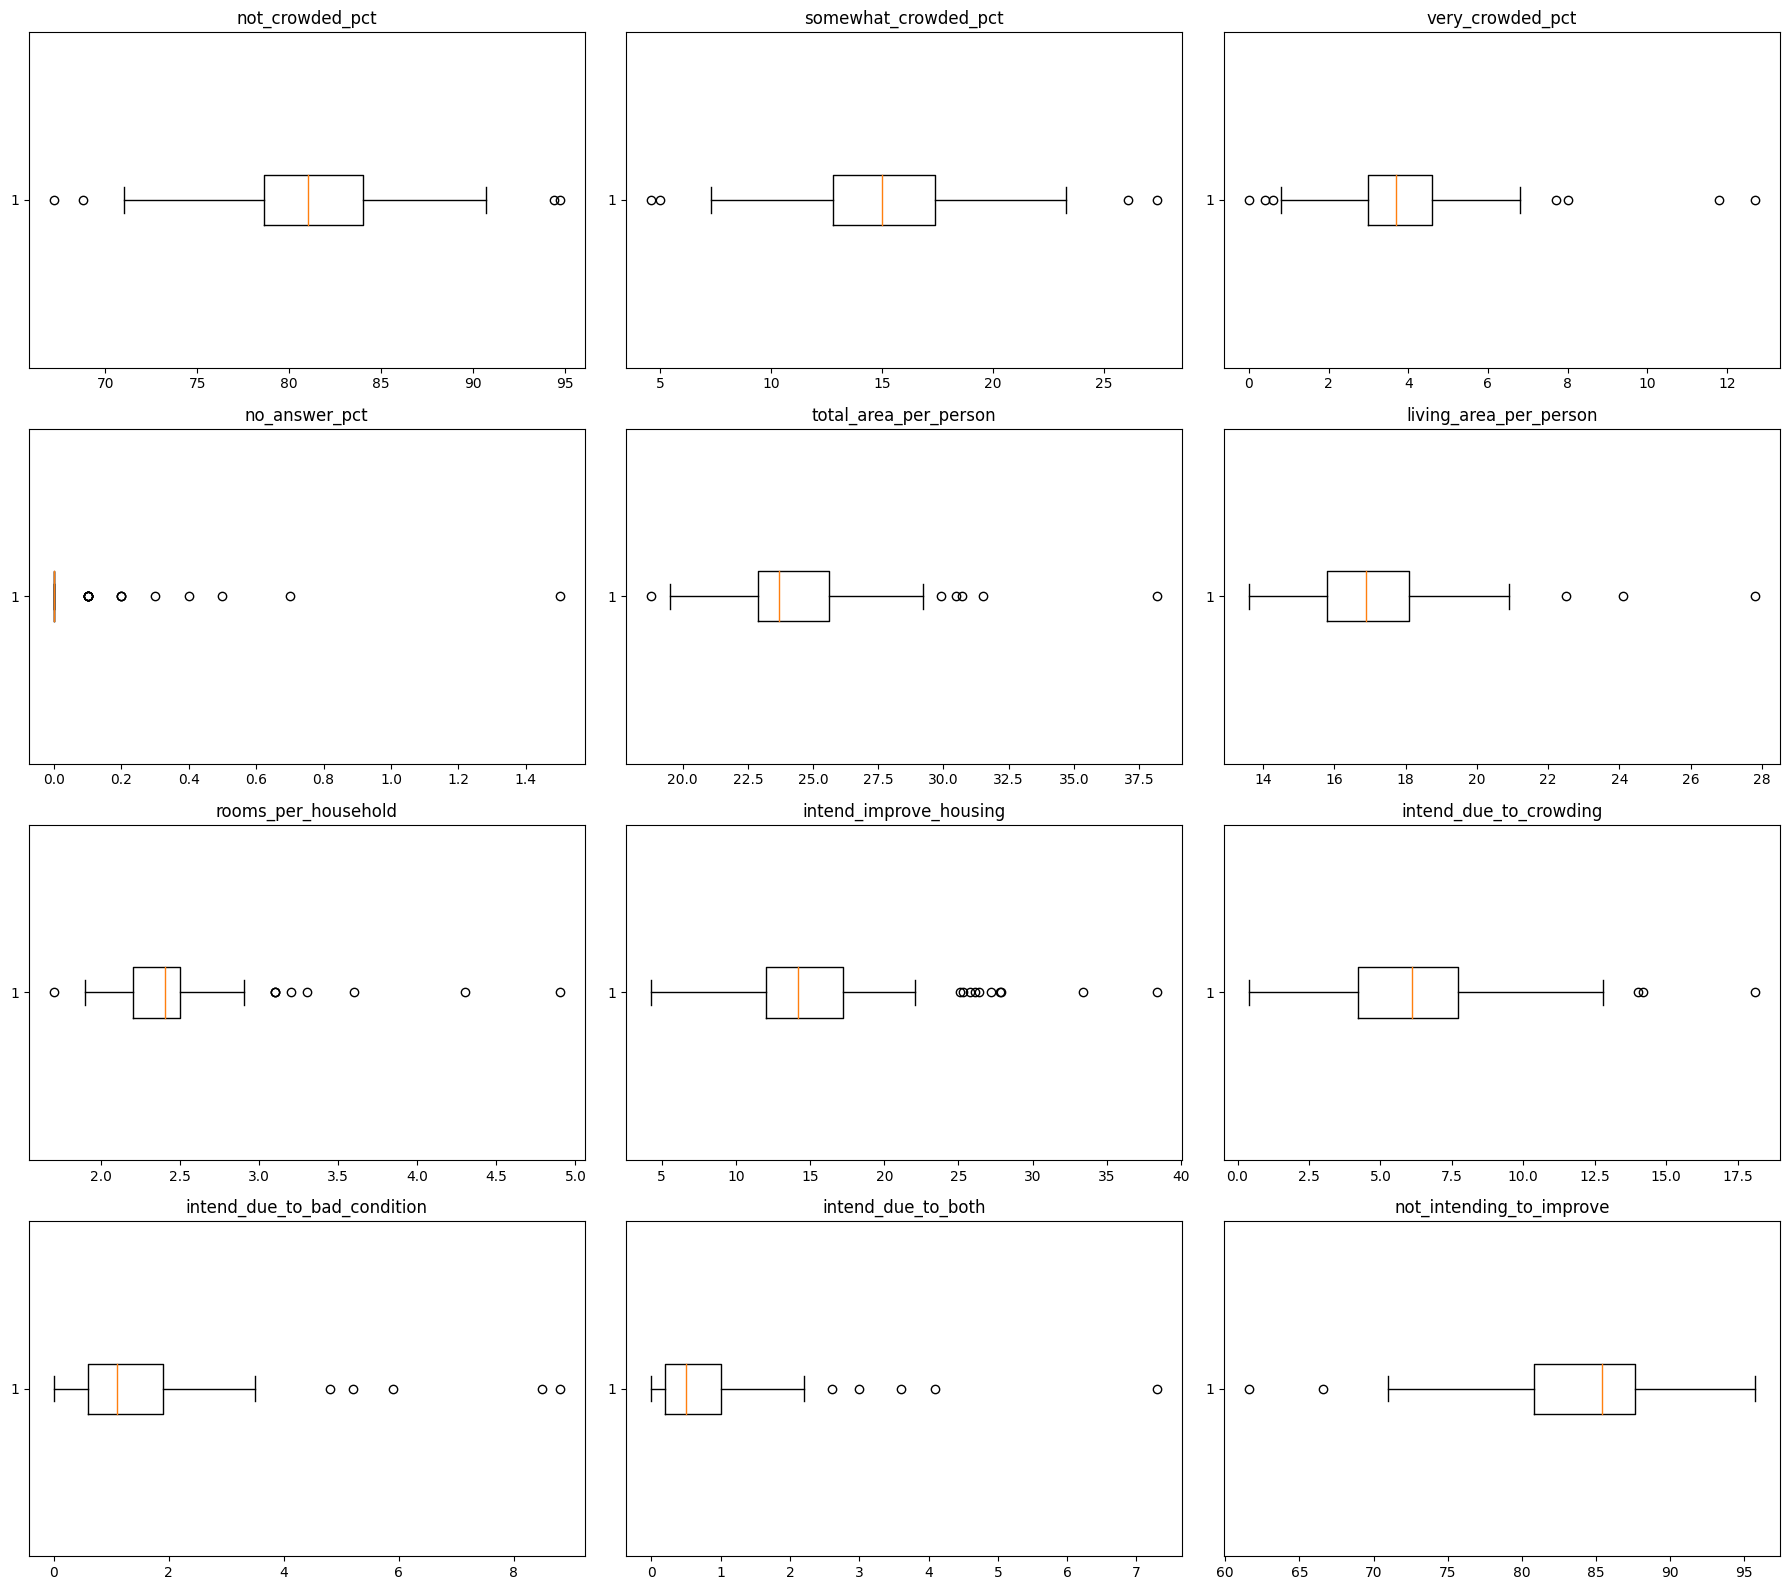

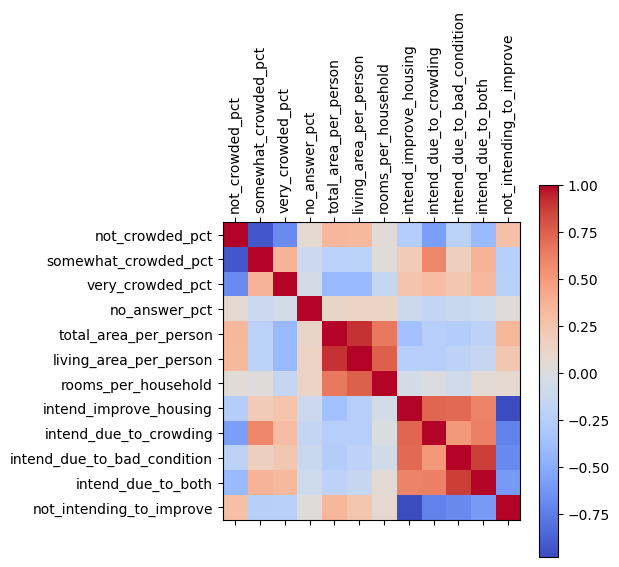

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
file_path = "../../outputs/standardized_datasets/housing_standardized.csv"
df = pd.read_csv(file_path)

# 2. Фильтрация по region_standard
df_filtered = df[df["region_standard"].notna()]

# Приведение плановых колонок в числовые
plan_cols = [
    "plan_dolevka",
    "plan_queue",
    "plan_resettle",
    "plan_buy_or_build",
    "plan_rent",
    "plan_other",
    "no_answer"
]
for col in plan_cols:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors="coerce")

# 3. Удаляем плановые колонки
df_final = df_filtered.drop(columns=plan_cols)

# 4. Проверка дубликатов
print(df_final.duplicated().sum())

# 5. Проверка пропусков
print(df_final.isnull().sum().sum())

# 6. Количество строк и колонок
print(df_final.shape[0])
print(df_final.shape[1])

# 7. Количество уникальных регионов
print(df_final["region_standard"].nunique())

# 8. Описательная статистика
print(df_final.describe())

# 9. Топ-5 по площади
print(
    df_final[["region_standard", "total_area_per_person"]]
    .sort_values(by="total_area_per_person", ascending=False)
    .head(5)
)

# 10. Топ-5 по комнатам
print(
    df_final[["region_standard", "rooms_per_household"]]
    .sort_values(by="rooms_per_household", ascending=False)
    .head(5)
)

# 11. Топ-5 по проценту планирующих улучшение
print(
    df_final[["region_standard", "intend_improve_housing"]]
    .sort_values(by="intend_improve_housing", ascending=False)
    .head(5)
)

# 12. Гистограммы
numeric_cols = [
    "not_crowded_pct",
    "somewhat_crowded_pct",
    "very_crowded_pct",
    "no_answer_pct",
    "total_area_per_person",
    "living_area_per_person",
    "rooms_per_household",
    "intend_improve_housing",
    "intend_due_to_crowding",
    "intend_due_to_bad_condition",
    "intend_due_to_both",
    "not_intending_to_improve"
]

plt.figure(figsize=(18, 16))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i+1)
    plt.hist(df_final[col], bins=20, edgecolor="black")
    plt.title(col)
plt.tight_layout()
plt.show()

# 13.  Boxplots
plt.figure(figsize=(18, 16))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i+1)
    plt.boxplot(df_final[col].dropna(), vert=False)
    plt.title(col)
plt.tight_layout()
plt.show()

# 14. Корреляция
corr = df_final[numeric_cols].corr()
plt.matshow(corr, cmap='coolwarm')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()


# EDA таблицы `housing_standardized.csv`

**Описание данных**
- 85 записей по 85 регионам.
- Период: 2020 год.
- Показатели: жилищные условия населения (% тесноты, площадь, планы улучшений).

---

**Типы данных**
- Все признаки корректны:
  - `Год` — int64
  - Жилищные показатели — float64
  - `region_standard` — object

---

**Пропуски**
- Отсутствуют после удаления колонок с планами улучшения жилья.

---

**Дубликаты**
- Не обнаружено.

---

**Основные статистики**
- Процент не тесно живущих: среднее ~81%, минимум ~67%.
- Площадь на человека: среднее ~24.4 кв.м., максимум ~38.2 кв.м.
- Количество комнат: среднее ~2.5, максимум ~4.9.
- Процент планирующих улучшить жильё: среднее ~15%, максимум ~38%.
- Процент не планирующих улучшение: среднее ~84%.

---

**Топ-5 региональных значений по площади на человека**
1. Республика Ингушетия — 38.2 кв.м.
2. Ненецкий автономный округ — 31.5 кв.м.
3. Республика Калмыкия — 30.7 кв.м.
4. Брянская область — 30.5 кв.м.
5. Республика Дагестан — 29.9 кв.м.

---

**Топ-5 региональных значений по количеству комнат**
(см. консольный вывод)

---

**Топ-5 регионов по проценту планирующих улучшить жильё**
(см. консольный вывод)

---

**Выбросы**
- Количество выбросов по IQR в разных показателях:
  - `very_crowded_pct`: 7
  - `rooms_per_household`: 9
  - `intend_improve_housing`: 10
- Все выбросы соответствуют реальным различиям.
- **Удалять не требуется.**

---

**Тренды**
- Распределения большинства признаков близки к нормальным или слегка скошены.
- Площадь и количество комнат демонстрируют регионы-лидеры.
- Высокий процент планирующих улучшение характерен для некоторых республик.

---

**Визуализации**
- Гистограммы и boxplot по всем числовым признакам.
- Тепловая карта корреляций.

---

**Вывод**
- Данные очищены и готовы к объединению с другими таблицами.
- При моделировании рекомендуется учитывать регионы-лидеры и скошенность распределений.


In [2]:
# Cохранение результатов после EDA
df.to_csv("../../data/clean/housing_AfterEDA.csv", index=False)